## 2022-01-18
* The below notebook was adjusted from [COMBLE-MIP](https://arm-development.github.io/comble-mip/).
* It compares selected simulations against observational targets that were collected from satellite and ground-based retrievals.
* In case of questions or concerns, please notify [Ann Fridlind](mailto:ann.fridlind@nasa.gov) and [Florian Tornow](mailto:ft2544@columbia.edu).
* Please check out our [description of this case](https://nasa-giss.github.io/LES-SCM/notebooks/case_descr_20220118.html).

In [2]:
%run functions_plotting.py 
 
## select simulations to plot
sim_keyword = '20220118'  

In [12]:
#### load ERA5 fields
#era5_1d, era5_2d = load_era5(PATH='../data_files/')
era5_1d = load_era5csv(PATH='../data_files/',case=sim_keyword)

## load radiosondes
#rs_dat = load_rs(t_filter = 7.)

## load ACTIVATE data
activate_insitu_dat = load_activate_insitu(case=sim_keyword)
activate_remote_dat = load_activate_remote(case=sim_keyword)
activate_dropsonde_dat = load_activate_dropsonde(case=sim_keyword)

## load MAC-LWP
maclwp_dat = load_maclwp(case=sim_keyword,t_filter = 0.) 

## load MODIS, VIIRS, and SENTINEL retrievals
modis_dat = load_modis(case=sim_keyword,t_filter = 0.,sza_filter = 65.)
viirs_dat = load_viirs(case=sim_keyword,t_filter = 0.,sza_filter = 65.)
goes_dat  = load_goes(case=sim_keyword,t_filter = 0.,sza_filter = 65.)

## load CERES retrievals
ceres_dat = load_ceres(case=sim_keyword,t_filter = 0.)

## load CALIPSO retrievals (note the increased time window)
#calipso_dat = load_calipso(case=sim_keyword,t_filter = 3.)

In [14]:
## load all simulations located in subfolders of the given directory
var_vec_1d = ['z0','z0h','z0q','hfss','hfls','ts'] # variables with ERA5 (longer time axis)
var_vec_2d = ['theta','qv','ua','va']
df_col_1d_les,df_col_2d_les = load_sims('../output_les/',var_vec_1d,var_vec_2d,keyword=sim_keyword,subfolder='s',ignore='2D')
df_col_1d_scm,df_col_2d_scm = load_sims('../output_scm/',var_vec_1d,var_vec_2d,keyword=sim_keyword,subfolder='s',ignore='2D')

Loading variables: f(time)
../output_les/dharma/activate_20220118_progNa.nc
../output_les/dharma/activate_20220118_diagNa_noice.nc
../output_les/dharma/activate_20220118_noice.nc
../output_les/dharma/activate_20220118_diagNa.nc
Loading variables: f(time,height)
../output_les/dharma/activate_20220118_progNa.nc
../output_les/dharma/activate_20220118_diagNa_noice.nc
../output_les/dharma/activate_20220118_noice.nc
../output_les/dharma/activate_20220118_diagNa.nc
Loading variables: f(time)
../output_scm/modele/activate_20220118_diagNa_noice.nc
../output_scm/modele/activate_20220118_diagNa.nc
Loading variables: f(time,height)
../output_scm/modele/activate_20220118_diagNa_noice.nc
../output_scm/modele/activate_20220118_diagNa.nc


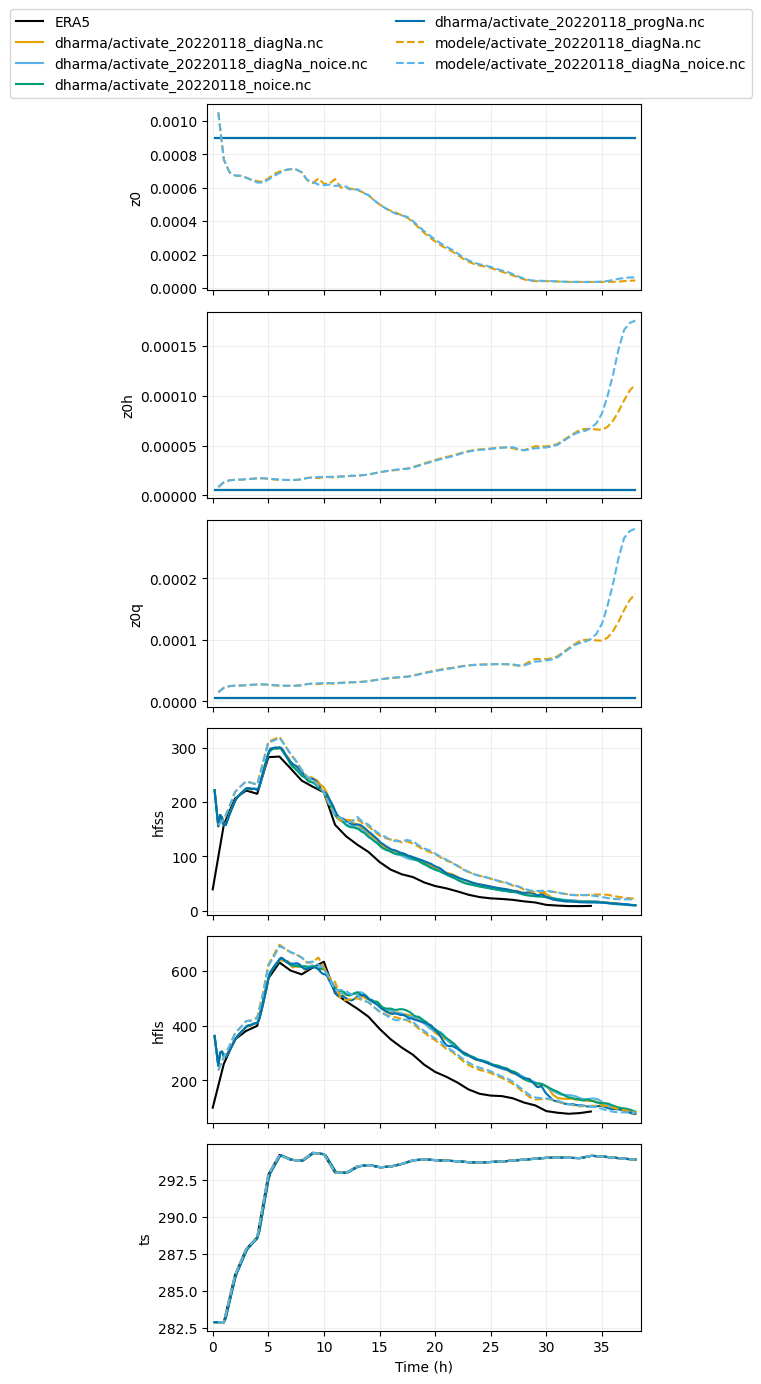

In [15]:
%run functions_plotting.py 

## plot variables that have only time dependence
#plot_1d(pd.concat([df_col_1d,era5_1d,carra_dat,srfflux_dat]),var_vec_1d)dependence
plot_1d(pd.concat([df_col_1d_les,df_col_1d_scm,era5_1d]),var_vec_1d)

In [9]:
%run functions_plotting.py 

## load all simulations located in subfolders of the given directory
var_vec_1d = ['lwpr','lwpc','iwp','od','cfc','rlut','clt','nqc'] # variables without ERA5 (shorter time axis)
var_vec_2d_les = ['theta','qv','qlc','qlr','ta','ua','va','qic','qis','qig','ua','va','ta','prf']
var_vec_2d_scm = ['theta','qv','qlc','qlr','ta','ua','va','qicc','qics','qipc','qips','ua','va','ta','prf','fc']
df_col_1d_les,df_col_2d_les = load_sims('../output_les/',var_vec_1d,var_vec_2d_les,keyword=sim_keyword,diag_zi_ctt=True,ignore='2D')
df_col_1d_scm,df_col_2d_scm = load_sims('../output_scm/',var_vec_1d,var_vec_2d_scm,keyword=sim_keyword,diag_zi_ctt=True,ignore='2D')

Loading variables: f(time)
../output_les/dharma/activate_20220118_progNa.nc
cfc not found in ../output_les/dharma/activate_20220118_progNa.nc
../output_les/dharma/activate_20220118_diagNa_noice.nc
iwp shows NAN values in ../output_les/dharma/activate_20220118_diagNa_noice.nc
cfc not found in ../output_les/dharma/activate_20220118_diagNa_noice.nc
../output_les/dharma/activate_20220118_noice.nc
iwp shows NAN values in ../output_les/dharma/activate_20220118_noice.nc
cfc not found in ../output_les/dharma/activate_20220118_noice.nc
../output_les/dharma/activate_20220118_diagNa.nc
cfc not found in ../output_les/dharma/activate_20220118_diagNa.nc
Loading variables: f(time,height)
../output_les/dharma/activate_20220118_progNa.nc
../output_les/dharma/activate_20220118_diagNa_noice.nc
qic shows NAN values in ../output_les/dharma/activate_20220118_diagNa_noice.nc
qis shows NAN values in ../output_les/dharma/activate_20220118_diagNa_noice.nc
qig shows NAN values in ../output_les/dharma/activate_20

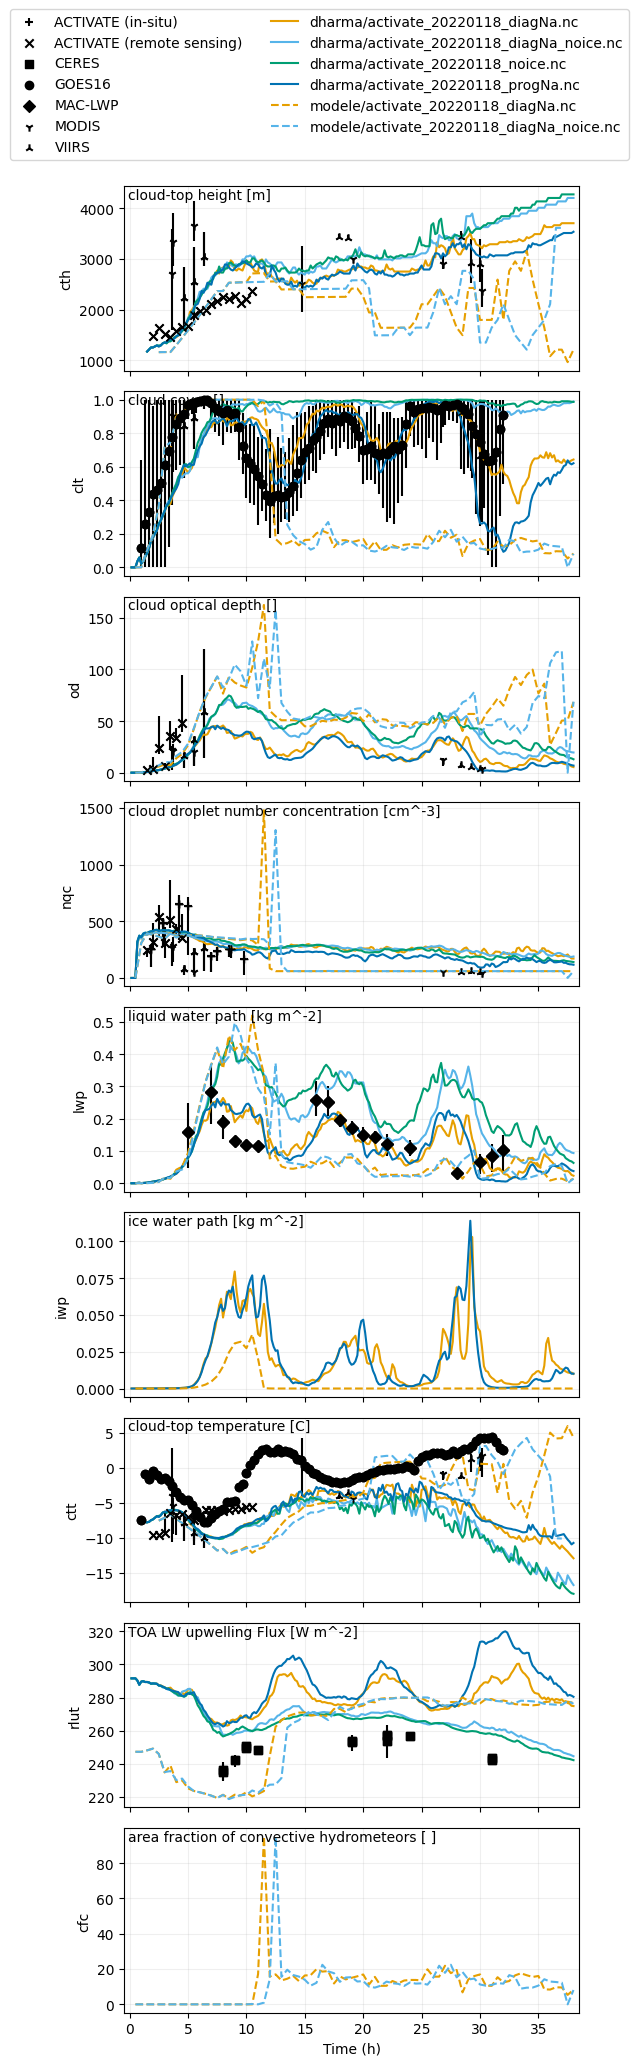

In [10]:
%run functions_plotting.py 
## plot variables that have only time dependence
#plot_1d(pd.concat([df_col_1d,maclwp_dat,modis_dat,viirs_dat,sentinel_dat,kazrkollias_dat,kazrclough_dat,calipso_dat,radflux_dat]),['zi','od','lwp','iwp','ctt'])

#plot_1d(pd.concat([df_col_1d,maclwp_dat,kazrkollias_dat,kazrclough_dat,calipso_dat,radflux_dat]),['cth','od','lwp','iwp','ctt'],longnames=['cloud-top height','cloud optical depth','liquid water path','ice water path','cloud-top temperature'],units=['m','','kg m^-2','kg m^-2','C'])
plot_1d(pd.concat([df_col_1d_les,df_col_1d_scm,ceres_dat,maclwp_dat,modis_dat,viirs_dat,goes_dat,activate_remote_dat,activate_insitu_dat]),['cth','clt','od','nqc','lwp','iwp','ctt','rlut','cfc'],longnames=['cloud-top height','cloud cover','cloud optical depth','cloud droplet number concentration','liquid water path','ice water path','cloud-top temperature','TOA LW upwelling Flux','area fraction of convective hydrometeors'],units=['m','','','cm^-3','kg m^-2','kg m^-2','C','W m^-2',' '])

## plot variables that have only time dependence (for now excluding imager retrievals that are mostly SZA > 70)
#plot_1d(pd.concat([df_col_1d,maclwp_dat,kazrkollias_dat,kazrclough_dat,calipso_dat,gongiwp_dat,radflux_dat]),['od','lwp','iwp']) #'zi','od','lwp','iwp

Computing wind speed
Computing wind direction
temporal averaging over 1.0 h interval


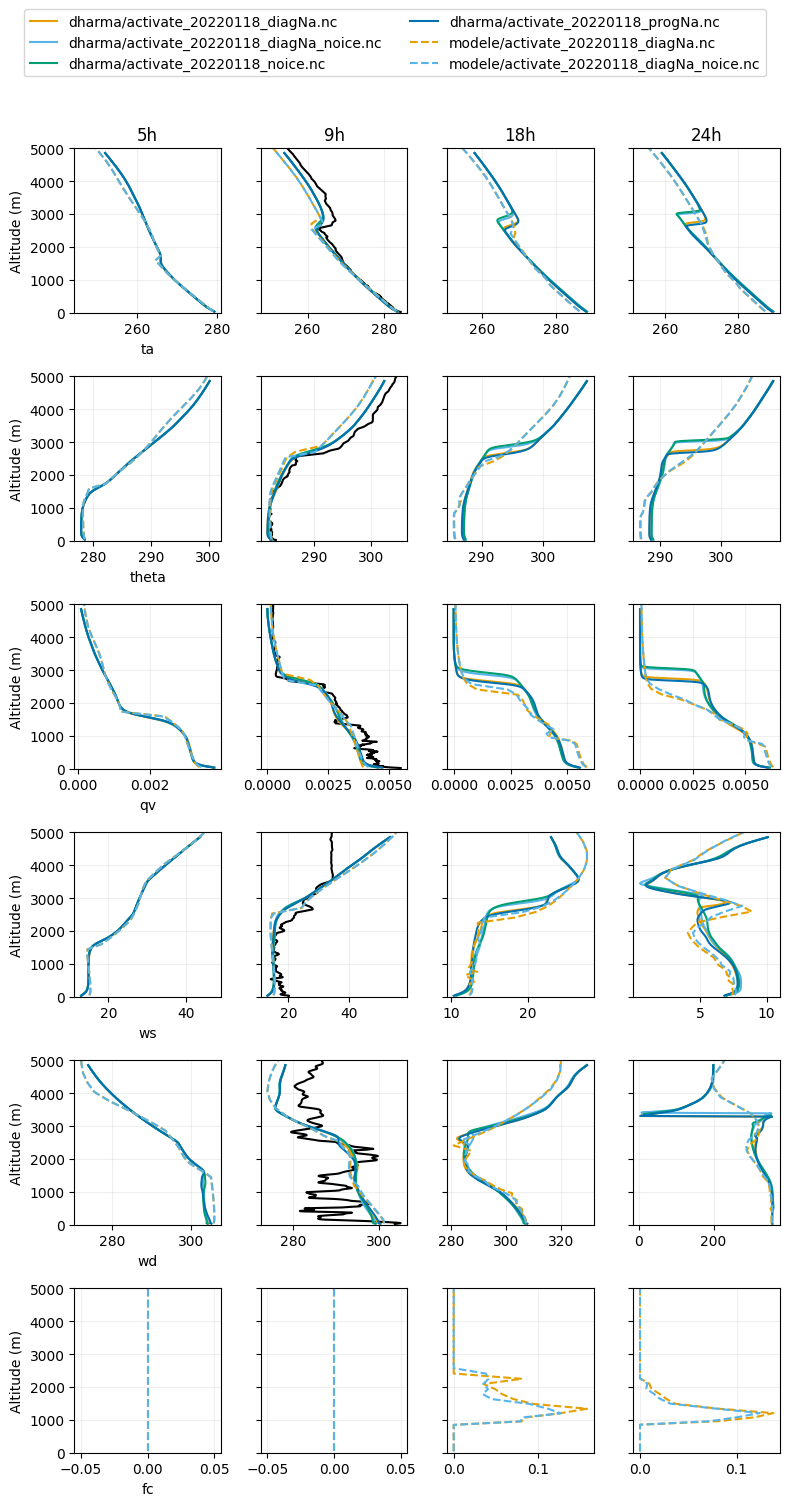

<Figure size 1000x600 with 0 Axes>

In [11]:
%run functions_plotting.py

## plot all variables that have time and height dependence
#plot_2d(df_col_2d,var_vec_2d,[0,3,6,9,12,15,18],z_max=6000)
     
## example where ERA5 and radiosonde are included
#plot_2d(pd.concat([df_col_2d,era5_2d,rs_dat,aeri_dat]),var_vec = ['ta','theta','qv','ws','wd'],times=[-1.5,0,4,8,18],z_max=6000)
plot_2d(pd.concat([df_col_2d_les,df_col_2d_scm,activate_dropsonde_dat]),var_vec = ['ta','theta','qv','ws','wd','fc'],times=[5,9,18,24],z_max=5000)
